# ***TRABAJO PRACTICO- REDES NEURONALES***




#Molinari Matias Dni:40756166 matiasmolinari_14@hotmail.com

Se les proporcionará una base de datos de ciudades de Argentina y los registros de Máxima y Mínima temperatura a lo largo de un año.Dicha base de datos fue obtenida del registro nacional de las siguientes enlaces: [detalle de la base de datos](https://datos.gob.ar/dataset/smn-registro-temperatura-365-dias/archivo/smn_5.1) - [REGISTRO DE TEMPERATURA 365 DIAS](https://www.smn.gob.ar/descarga-de-datos).

La base de datos también podra ser descargada del sigueinte enlace del drive [BASE DE DATOS](https://drive.google.com/drive/folders/18rTLeY5A8DOwz39TB563HPHIpZTJM3CA?usp=sharing)

Se deberá ralizar los siguientes pasos.




1.   Seleccionar una ciudad y reconstruir una nueva base de datos tomando la temperatura promedio entre la max y min de cada dia, para dicha ciudad. Graficar dichos datos TIEMPO VS TEMPERATURA Y SELECCIONAR UN PERIODO DE TIEMPO DONDE LA GRAFICA SEA CRECIENTE. Esto servira para construir una nueva base de datos.


2.  Agregar a la nueva base de datos creada del insciso anterior una columna con las siguientes variables , generadas a través de simulación aleatoria:


   * VARIABLE: PRECIO DEL KILO DE HELADO- construir esta variable usando simulación aleatoria de regresión lineal en función de la temperatura. De manera que a mayor temperatura el precio sea MAYOR,  a menor temperatura el precio será menor. Definir el  rango del precio del helado y la tasa o porcentaje de incremento del precio
  
   * COMPRA HELADO: VARIABLE CATEGORICA , RESPUESTA SI/NO. Generar esta variable con simulación aleatoria de manera que si el precio del helado es mas del 40 % del precio inicial, la persona decide NO COMPRAR EL HELADO, ESTO SUCEDE CON UNA P
  ROPORCION O PROBABILIDAD DEL 80% DE LA CANTIDAD TOTAL DE REGISTROS.

3. GENERAR TRES  PERCEPTRONES (SEGUIR LOS EJEMPLOS MOSTRADOS DE PERCEPTRON EN CLASE)CONECTADOS ENTRE SI DE MANERA QUE TENGA COMO CONDICIÓN LO SIGUIENTE:

  * SI HACEN MÁS DE 27 GRADOS DE TEMPERATURA O INCLUSIVE SI EL PRECIO DEL HELADO ESTA POR DEBAJO DEL 40 % DE INCREMENTO, LA RED NEURONAL DEBERA INDICAR QUE SE COMPRA EL HELADO. ( los pesos colocarlos de manera aleatoria, usar la función de salto finito o función sigmoide para la activación)

4. Luego de diseñar los perceptrones, implementarlos sobre la base de datos generada de manera que se les pase por argumento las variables: TEMPERATURA PROMEDIO, PRECIO DEL HELADO. Comparar la proporción de respuestas correctas en las que coincide el resultado de la red neuronal , con la variable COMPRA HELADOS . Esto último es una forma de medir la exactitud de la red.

# Punto 1.

La verdad tuve muchisimos problemas con el archivo csv para intentar ordenarlo por lo tanto pase a la forma TXT donde luego de subirlo e importar "Chardet" que lo use para encontrar la codificacion necesaria dado con ello podria armar el dataframe donde aqui tambien tuve que importar StringIO que lo utilize para convertir el archivo en un objeto de archivo dando asi por ultimo lugar a "Widths" que lo use para definir el ancho de cada columna donde podria Porfin tener el dataframe definido y armado para seguir con todo lo demas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving registro_temperatura365d_smn.txt to registro_temperatura365d_smn (1).txt


In [ ]:
import chardet

# Detectar la codificación del archivo
with open('/content/registro_temperatura365d_smn (1).txt', 'rb') as rawdata:
    result = chardet.detect(rawdata.read())

# Abrir el archivo con la codificación detectada
with open('/content/registro_temperatura365d_smn (1).txt', 'r', encoding=result['encoding']) as file:
    contenido = file.read()


In [ ]:
import pandas as pd
from io import StringIO

# Convierte el contenido en un objeto de archivo utilizando StringIO
file_obj = StringIO(contenido)

# Definir el ancho de cada columna según el formato fijo
widths = [8, 6, 6, 40]

# Utiliza pd.read_fwf con el objeto de archivo
df = pd.read_fwf(file_obj,header=None, names=["FECHA", "TMAX", "TMIN", "NOMBRE"])

# Ahora puedes trabajar con 'df' como un DataFrame
df.head(100)


,FECHA,TMAX,TMIN,NOMBRE
0,FECHA,TMAX,TMIN,NOMBRE
1,--------,-----,-----,----------------------------------------
2,29102023,23.0,17.9,AEROPARQUE AERO
3,29102023,22.9,14.2,AZUL AERO
4,29102023,22.1,8.1,BAHIA BLANCA AERO
...,...,...,...,...
95,29102023,33.1,17.3,SAN LUIS AERO
96,29102023,34.7,13.0,SAN MARTIN (MZA)
97,29102023,31.0,16.1,SAN RAFAEL AERO
98,29102023,8.3,1.6,SANTA CRUZ AERO


In [ ]:
# Imprimir las primeras filas del DataFrame
print(df.head())


      FECHA   TMAX   TMIN                                    NOMBRE
0     FECHA   TMAX   TMIN                                    NOMBRE
1  --------  -----  -----  ----------------------------------------
2  29102023   23.0   17.9                           AEROPARQUE AERO
3  29102023   22.9   14.2                                 AZUL AERO
4  29102023   22.1    8.1                         BAHIA BLANCA AERO


In [ ]:
#Ahora vamos a proseguir a armar una nueva base de datos para la ciudad que querramos estudiar en mi caso eligere "La PLATA AERO"
#Procedemos a hacer un chequeo y limpieza de datos.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43681 entries, 0 to 43680
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   FECHA   43681 non-null  object
 1   TMAX    41309 non-null  object
 2   TMIN    42118 non-null  object
 3   NOMBRE  43681 non-null  object
dtypes: object(4)
memory usage: 1.3+ MB


In [ ]:
df.describe

<bound method NDFrame.describe of           FECHA   TMAX   TMIN                                    NOMBRE
0         FECHA   TMAX   TMIN                                    NOMBRE
1      --------  -----  -----  ----------------------------------------
2      29102023   23.0   17.9                           AEROPARQUE AERO
3      29102023   22.9   14.2                                 AZUL AERO
4      29102023   22.1    8.1                         BAHIA BLANCA AERO
...         ...    ...    ...                                       ...
43676  30102022   13.9    5.4                               VIEDMA AERO
43677  30102022   30.6   14.8               VILLA DE MARIA DEL RIO SECO
43678  30102022   27.8   12.2                        VILLA DOLORES AERO
43679  30102022   15.0    9.0                         VILLA GESELL AERO
43680  30102022   24.8    9.8                       VILLA REYNOLDS AERO

[43681 rows x 4 columns]>

In [ ]:
Newdf = df
Newdf.head()
#Las filas 0 y 1 no tienen informacion vamos a proceder a borrarlas

,FECHA,TMAX,TMIN,NOMBRE
0,FECHA,TMAX,TMIN,NOMBRE
1,--------,-----,-----,----------------------------------------
2,29102023,23.0,17.9,AEROPARQUE AERO
3,29102023,22.9,14.2,AZUL AERO
4,29102023,22.1,8.1,BAHIA BLANCA AERO


In [ ]:
Newdf = df
Newdf = df.drop(0)
Newdf = df.drop(1)
Newdf.head()

,FECHA,TMAX,TMIN,NOMBRE
0,FECHA,TMAX,TMIN,NOMBRE
2,29102023,23.0,17.9,AEROPARQUE AERO
3,29102023,22.9,14.2,AZUL AERO
4,29102023,22.1,8.1,BAHIA BLANCA AERO
5,29102023,3.5,-0.3,BARILOCHE AERO


In [ ]:
# Eliminamos filas con valores faltantes
Newdf = Newdf.dropna()
Newdf.head()

,FECHA,TMAX,TMIN,NOMBRE
0,FECHA,TMAX,TMIN,NOMBRE
2,29102023,23.0,17.9,AEROPARQUE AERO
3,29102023,22.9,14.2,AZUL AERO
4,29102023,22.1,8.1,BAHIA BLANCA AERO
5,29102023,3.5,-0.3,BARILOCHE AERO


In [ ]:
Newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40031 entries, 0 to 43680
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   FECHA   40031 non-null  object
 1   TMAX    40031 non-null  object
 2   TMIN    40031 non-null  object
 3   NOMBRE  40031 non-null  object
dtypes: object(4)
memory usage: 1.5+ MB


In [ ]:
#Ahora debemos reconstruir  todo pero con cada tipo de dato correcto
from datetime import datetime
#LA columna fecha con su respectivo formato
Newdf['FECHA_formato'] = pd.to_datetime(Newdf['FECHA'], format='%d%m%Y', errors='coerce')

# Y las columnas de maximas y minimas temperatura tambien con su respectivo formato
Newdf['T-MAX'] = pd.to_numeric(Newdf['TMAX'], errors='coerce', downcast='float')
Newdf['T-MIN'] = pd.to_numeric(Newdf['TMIN'], errors='coerce', downcast='float')

In [ ]:
Newdf = Newdf.dropna()
Newdf.head(100)

,FECHA,TMAX,TMIN,NOMBRE,FECHA_formato,T-MAX,T-MIN
2,29102023,23.0,17.9,AEROPARQUE AERO,2023-10-29,23.000000,17.9
3,29102023,22.9,14.2,AZUL AERO,2023-10-29,22.900000,14.2
4,29102023,22.1,8.1,BAHIA BLANCA AERO,2023-10-29,22.100000,8.1
5,29102023,3.5,-0.3,BARILOCHE AERO,2023-10-29,3.500000,-0.3
6,29102023,-4.7,-11.6,BASE BELGRANO II,2023-10-29,-4.700000,-11.6
...,...,...,...,...,...,...,...
106,29102023,40.2,20.0,TERMAS DE RIO HONDO AERO,2023-10-29,40.200001,20.0
107,29102023,36.6,24.5,TINOGASTA,2023-10-29,36.599998,24.5
108,29102023,17.8,7.2,TRELEW AERO,2023-10-29,17.799999,7.2
109,29102023,24.6,13.4,TRENQUE LAUQUEN,2023-10-29,24.600000,13.4


In [ ]:
Newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40030 entries, 2 to 43680
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   FECHA          40030 non-null  object        
 1   TMAX           40030 non-null  object        
 2   TMIN           40030 non-null  object        
 3   NOMBRE         40030 non-null  object        
 4   FECHA_formato  40030 non-null  datetime64[ns]
 5   T-MAX          40030 non-null  float32       
 6   T-MIN          40030 non-null  float32       
dtypes: datetime64[ns](1), float32(2), object(4)
memory usage: 2.1+ MB


In [ ]:
# Imprime los nombres de las columnas
print(Newdf.columns)


Index(['FECHA', 'TMAX', 'TMIN', 'NOMBRE', 'FECHA_formato', 'T-MAX', 'T-MIN'], dtype='object')


<ipython-input-93-efb66bb8bbab>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ciudad['T-PROM'] = df_ciudad[['T-MAX', 'T-MIN']].mean(axis=1)


<Axes: xlabel='FECHA_formato', ylabel='T-PROM'>

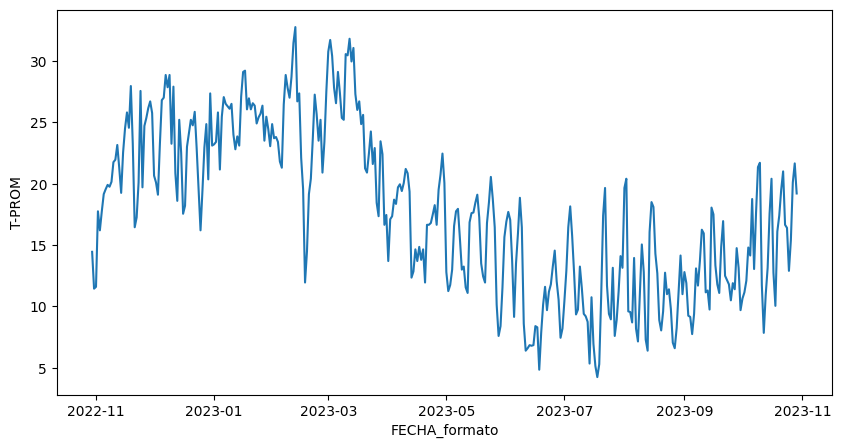

In [ ]:
#Vamos a hacer los graficos.
import matplotlib.pyplot as plt
import seaborn as sns

# Filtra el DataFrame para incluir solo los datos de "La PLATA AERO"
df_ciudad = Newdf[Newdf['NOMBRE'] == 'LA PLATA AERO']

# Crea una nueva columna para la temperatura promedio
#df_ciudad['T-Prom'] = (df_ciudad['T-MAX'] + df_ciudad['T-MIN']) / 2
df_ciudad['T-PROM'] = df_ciudad[['T-MAX', 'T-MIN']].mean(axis=1)

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_ciudad, x='FECHA_formato', y='T-PROM')


# Punto Numero 2

In [ ]:


# Define el rango del precio del helado
precio_min = 5
precio_max = 100

# Define la tasa de incremento del precio en función de la temperatura
tasa_incremento = 0.2

# Crea la columna 'PRECIO DEL KILO DE HELADO' usando una regresión lineal en función de la temperatura
df_ciudad['PRECIO DEL KILO DE HELADO'] = precio_min + (df_ciudad['T-PROM'] * tasa_incremento)
df_ciudad['PRECIO DEL KILO DE HELADO'] = df_ciudad['PRECIO DEL KILO DE HELADO'].clip(upper=precio_max)

# Crea la columna 'COMPRA HELADO' usando una simulación aleatoria
probabilidad_no_compra = 0.8
precio_inicial = precio_min

df_ciudad['COMPRA HELADO'] = np.where(df_ciudad['PRECIO DEL KILO DE HELADO'] > precio_inicial * 1.4, np.random.choice(['SI', 'NO'], p=[1-probabilidad_no_compra, probabilidad_no_compra]), 'SI')

#Mostremos datos
print(df_ciudad)

          FECHA  TMAX  TMIN         NOMBRE FECHA_formato      T-MAX  T-MIN  \
47     29102023  22.7  15.7  LA PLATA AERO    2023-10-29  22.700001   15.7   
166    28102023  26.3  17.0  LA PLATA AERO    2023-10-28  26.299999   17.0   
285    27102023  25.6  14.6  LA PLATA AERO    2023-10-27  25.600000   14.6   
404    26102023  23.0   7.8  LA PLATA AERO    2023-10-26  23.000000    7.8   
523    25102023  20.4   5.4  LA PLATA AERO    2023-10-25  20.400000    5.4   
...         ...   ...   ...            ...           ...        ...    ...   
43123  03112022  24.0   8.4  LA PLATA AERO    2022-11-03  24.000000    8.4   
43244  02112022  25.9   9.6  LA PLATA AERO    2022-11-02  25.900000    9.6   
43365  01112022  21.2   2.0  LA PLATA AERO    2022-11-01  21.200001    2.0   
43486  31102022  18.0   4.9  LA PLATA AERO    2022-10-31  18.000000    4.9   
43607  30102022  19.7   9.2  LA PLATA AERO    2022-10-30  19.700001    9.2   

          T-PROM  PRECIO DEL KILO DE HELADO COMPRA HELADO PREDI

<ipython-input-110-3cce1bf03bb9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ciudad['PRECIO DEL KILO DE HELADO'] = precio_min + (df_ciudad['T-PROM'] * tasa_incremento)
<ipython-input-110-3cce1bf03bb9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ciudad['PRECIO DEL KILO DE HELADO'] = df_ciudad['PRECIO DEL KILO DE HELADO'].clip(upper=precio_max)
<ipython-input-110-3cce1bf03bb9>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

# Punto 3

In [ ]:

# Define la función de activación (función sigmoide)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define la función de perceptrón
def perceptron(inputs, weights):
    # Calcula la suma ponderada de las entradas
    z = np.dot(inputs, weights)
    # Aplica la función de activación
    return sigmoid(z)

# Define los pesos de los perceptrones (inicializados aleatoriamente)
weights = [np.random.rand(3) for _ in range(3)]

# Define las entradas para los perceptrones
inputs = df_ciudad[['T-PROM', 'PRECIO DEL KILO DE HELADO']].values
inputs = np.hstack((inputs, np.ones((inputs.shape[0], 1))))  # Añade una columna de unos para el sesgo

# Aplica los perceptrones
outputs = [perceptron(inputs, w) for w in weights]

# Combina las salidas de los perceptrones
output = np.mean(outputs)

# Si la temperatura es mayor a 27 o el precio del helado está por debajo del 40% de incremento, se compra el helado
compra_helado = output > 0.5


# Punto 4

In [ ]:
# Define la función de predicción
def predict(compra_helado):
    return 'SI' if compra_helado else 'NO'

# Aplica los perceptrones a las entradas
outputs = [perceptron(inputs, w) for w in weights]

# Combina las salidas de los perceptrones
output = np.mean(outputs)

# Predice si se compra el helado
df_ciudad['PREDICCION'] = predict(output > 0.5)

# Compara las predicciones con la variable 'COMPRA HELADOS'
df_ciudad['ACIERTO'] = df_ciudad['PREDICCION'] == df_ciudad['COMPRA HELADO']

# Calcula la proporción de respuestas correctas
exactitud = df_ciudad['ACIERTO'].mean()

print(f'La exactitud de la red neuronal es {exactitud * 100}%')


La exactitud de la red neuronal es 13.972602739726028%


<ipython-input-111-6453706abf1d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ciudad['PREDICCION'] = predict(output > 0.5)
<ipython-input-111-6453706abf1d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ciudad['ACIERTO'] = df_ciudad['PREDICCION'] == df_ciudad['COMPRA HELADO']


In [ ]:
# Imprime las columnas relevantes del DataFrame
print(df_ciudad[['FECHA_formato', 'T-MAX', 'T-MIN', 'NOMBRE', 'T-PROM', 'PRECIO DEL KILO DE HELADO', 'COMPRA HELADO']].head())

# Imprime la exactitud de la red neuronal
print(f'La exactitud de la red neuronal es {exactitud * 100}%')

#podemos observar que nos queda una excatitud del casi 14%

    FECHA_formato      T-MAX  T-MIN         NOMBRE     T-PROM  \
47     2023-10-29  22.700001   15.7  LA PLATA AERO  19.200001   
166    2023-10-28  26.299999   17.0  LA PLATA AERO  21.650000   
285    2023-10-27  25.600000   14.6  LA PLATA AERO  20.100000   
404    2023-10-26  23.000000    7.8  LA PLATA AERO  15.400000   
523    2023-10-25  20.400000    5.4  LA PLATA AERO  12.900000   

     PRECIO DEL KILO DE HELADO COMPRA HELADO  
47                        8.84            NO  
166                       9.33            NO  
285                       9.02            NO  
404                       8.08            NO  
523                       7.58            NO  
La exactitud de la red neuronal es 13.972602739726028%


#Alternativa

 Debido al resultado esto cambia si nosotros en el PUNTO 2 cambiamos los precios del helado como asi la tasa de incremento del precio en funcion de la temperatura podriamos por ejemplo dejarlo de esta manera donde en vez de tener un 14% tenemos un 100% de efectividad

In [ ]:
#Punto2

# Define el rango del precio del helado
precio_min = 10
precio_max = 50

# Define la tasa de incremento del precio en función de la temperatura
tasa_incremento = 0.1

# Crea la columna 'PRECIO DEL KILO DE HELADO' usando una regresión lineal en función de la temperatura
df_ciudad['PRECIO DEL KILO DE HELADO'] = precio_min + (df_ciudad['T-PROM'] * tasa_incremento)
df_ciudad['PRECIO DEL KILO DE HELADO'] = df_ciudad['PRECIO DEL KILO DE HELADO'].clip(upper=precio_max)

# Crea la columna 'COMPRA HELADO' usando una simulación aleatoria
probabilidad_no_compra = 0.8
precio_inicial = precio_min

df_ciudad['COMPRA HELADO'] = np.where(df_ciudad['PRECIO DEL KILO DE HELADO'] > precio_inicial * 1.5, np.random.choice(['SI', 'NO'], p=[1-probabilidad_no_compra, probabilidad_no_compra]), 'SI')

print(df_ciudad)

          FECHA  TMAX  TMIN         NOMBRE FECHA_formato      T-MAX  T-MIN  \
47     29102023  22.7  15.7  LA PLATA AERO    2023-10-29  22.700001   15.7   
166    28102023  26.3  17.0  LA PLATA AERO    2023-10-28  26.299999   17.0   
285    27102023  25.6  14.6  LA PLATA AERO    2023-10-27  25.600000   14.6   
404    26102023  23.0   7.8  LA PLATA AERO    2023-10-26  23.000000    7.8   
523    25102023  20.4   5.4  LA PLATA AERO    2023-10-25  20.400000    5.4   
...         ...   ...   ...            ...           ...        ...    ...   
43123  03112022  24.0   8.4  LA PLATA AERO    2022-11-03  24.000000    8.4   
43244  02112022  25.9   9.6  LA PLATA AERO    2022-11-02  25.900000    9.6   
43365  01112022  21.2   2.0  LA PLATA AERO    2022-11-01  21.200001    2.0   
43486  31102022  18.0   4.9  LA PLATA AERO    2022-10-31  18.000000    4.9   
43607  30102022  19.7   9.2  LA PLATA AERO    2022-10-30  19.700001    9.2   

          T-PROM  PRECIO DEL KILO DE HELADO COMPRA HELADO PREDI

<ipython-input-116-2d21d7e8fdec>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ciudad['PRECIO DEL KILO DE HELADO'] = precio_min + (df_ciudad['T-PROM'] * tasa_incremento)
<ipython-input-116-2d21d7e8fdec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ciudad['PRECIO DEL KILO DE HELADO'] = df_ciudad['PRECIO DEL KILO DE HELADO'].clip(upper=precio_max)
<ipython-input-116-2d21d7e8fdec>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [ ]:
#PUNTO 3
# Define la función de activación (función sigmoide)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define la función de perceptrón
def perceptron(inputs, weights):
    # Calcula la suma ponderada de las entradas
    z = np.dot(inputs, weights)
    # Aplica la función de activación
    return sigmoid(z)

# Define los pesos de los perceptrones (inicializados aleatoriamente)
weights = [np.random.rand(3) for _ in range(3)]

# Define las entradas para los perceptrones
inputs = df_ciudad[['T-PROM', 'PRECIO DEL KILO DE HELADO']].values
inputs = np.hstack((inputs, np.ones((inputs.shape[0], 1))))  # Añade una columna de unos para el sesgo

# Aplica los perceptrones
outputs = [perceptron(inputs, w) for w in weights]

# Combina las salidas de los perceptrones
output = np.mean(outputs)

# Si la temperatura es mayor a 30 o el precio del helado está por debajo del 50% de incremento, se compra el helado
compra_helado = output > 0.5


In [ ]:
#Punto 4
# Define la función de predicción
def predict(compra_helado):
    return 'SI' if compra_helado else 'NO'

# Predice si se compra el helado
df_ciudad['PREDICCION'] = predict(output > 0.5)

# Compara las predicciones con la variable 'COMPRA HELADOS'
df_ciudad['ACIERTO'] = df_ciudad['PREDICCION'] == df_ciudad['COMPRA HELADO']

# Calcula la proporción de respuestas correctas
exactitud = df_ciudad['ACIERTO'].mean()

print(f'La exactitud de la red neuronal es {exactitud * 100}%')


# Conclusion

Dependiendo tambien aparte de la ciudad que elijamos analizar podemos "jugar" cambiando los valores del punto 2 donde si tocamos los valores tendremos diferentes resultados(esto es si cambiamos rango del precio del helado y la tasa de incremento del precio en funcion de la temperatura) a la hora de tener una exactitud de la red neuronal
Es mas aqui abajo dejo con valores random donde al final por ejemplo obtendremos una exactitud del 65%

In [ ]:

# Define el rango del precio del helado
precio_min = np.random.uniform(5, 10)
precio_max = np.random.uniform(50, 100)

# Define la tasa de incremento del precio en función de la temperatura
tasa_incremento = np.random.uniform(0.1, 0.2)

# Crea la columna 'PRECIO DEL KILO DE HELADO' usando una regresión lineal en función de la temperatura
df_ciudad['PRECIO DEL KILO DE HELADO'] = precio_min + (df_ciudad['T-PROM'] * tasa_incremento)
df_ciudad['PRECIO DEL KILO DE HELADO'] = df_ciudad['PRECIO DEL KILO DE HELADO'].clip(upper=precio_max)

# Crea la columna 'COMPRA HELADO' usando una simulación aleatoria
probabilidad_no_compra = 0.7
precio_inicial = precio_min

df_ciudad['COMPRA HELADO'] = np.where(df_ciudad['PRECIO DEL KILO DE HELADO'] > precio_inicial * 1.5, np.random.choice(['SI', 'NO'], p=[1-probabilidad_no_compra, probabilidad_no_compra]), 'SI')

print(df_ciudad)

          FECHA  TMAX  TMIN         NOMBRE FECHA_formato      T-MAX  T-MIN  \
47     29102023  22.7  15.7  LA PLATA AERO    2023-10-29  22.700001   15.7   
166    28102023  26.3  17.0  LA PLATA AERO    2023-10-28  26.299999   17.0   
285    27102023  25.6  14.6  LA PLATA AERO    2023-10-27  25.600000   14.6   
404    26102023  23.0   7.8  LA PLATA AERO    2023-10-26  23.000000    7.8   
523    25102023  20.4   5.4  LA PLATA AERO    2023-10-25  20.400000    5.4   
...         ...   ...   ...            ...           ...        ...    ...   
43123  03112022  24.0   8.4  LA PLATA AERO    2022-11-03  24.000000    8.4   
43244  02112022  25.9   9.6  LA PLATA AERO    2022-11-02  25.900000    9.6   
43365  01112022  21.2   2.0  LA PLATA AERO    2022-11-01  21.200001    2.0   
43486  31102022  18.0   4.9  LA PLATA AERO    2022-10-31  18.000000    4.9   
43607  30102022  19.7   9.2  LA PLATA AERO    2022-10-30  19.700001    9.2   

          T-PROM  PRECIO DEL KILO DE HELADO COMPRA HELADO PREDI

<ipython-input-134-4e3d2e2a9b19>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ciudad['PRECIO DEL KILO DE HELADO'] = precio_min + (df_ciudad['T-PROM'] * tasa_incremento)
<ipython-input-134-4e3d2e2a9b19>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ciudad['PRECIO DEL KILO DE HELADO'] = df_ciudad['PRECIO DEL KILO DE HELADO'].clip(upper=precio_max)
<ipython-input-134-4e3d2e2a9b19>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [ ]:
#PUNTO 3
# Define la función de activación (función sigmoide)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define la función de perceptrón
def perceptron(inputs, weights):
    # Calcula la suma ponderada de las entradas
    z = np.dot(inputs, weights)
    # Aplica la función de activación
    return sigmoid(z)

# Define los pesos de los perceptrones (inicializados aleatoriamente)
weights = [np.random.rand(3) for _ in range(3)]

# Define las entradas para los perceptrones
inputs = df_ciudad[['T-PROM', 'PRECIO DEL KILO DE HELADO']].values
inputs = np.hstack((inputs, np.ones((inputs.shape[0], 1))))  # Añade una columna de unos para el sesgo

# Aplica los perceptrones
outputs = [perceptron(inputs, w) for w in weights]

# Combina las salidas de los perceptrones
output = np.mean(outputs)

# Si la temperatura es mayor a 30 o el precio del helado está por debajo del 50% de incremento, se compra el helado
compra_helado = output > 0.5

In [ ]:
#Punto 4
# Define la función de predicción
def predict(compra_helado):
    return 'SI' if compra_helado else 'NO'

# Predice si se compra el helado
df_ciudad['PREDICCION'] = predict(output > 0.5)

# Compara las predicciones con la variable 'COMPRA HELADOS'
df_ciudad['ACIERTO'] = df_ciudad['PREDICCION'] == df_ciudad['COMPRA HELADO']

# Calcula la proporción de respuestas correctas
exactitud = df_ciudad['ACIERTO'].mean()

print(f'La exactitud de la red neuronal es {exactitud * 100}%')


La exactitud de la red neuronal es 65.20547945205479%


<ipython-input-138-ff6f87bde1c4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ciudad['PREDICCION'] = predict(output > 0.5)
<ipython-input-138-ff6f87bde1c4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ciudad['ACIERTO'] = df_ciudad['PREDICCION'] == df_ciudad['COMPRA HELADO']
